<a href="https://colab.research.google.com/github/diggs1711/comma-ai-speed-challenge/blob/master/speed_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
from cv2 import VideoCapture
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
import gc
import math

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from pathlib import Path
drive_path = Path('/content/drive/My Drive/comma_ai_speed_challenge/speedchallenge-master/data/')

In [0]:
train_vals = np.array(pd.read_fwf(drive_path/'train.txt', header=None))

In [6]:
print(f"mean {train_vals.mean()}")
print(f"max {train_vals.max()}")
print(f"std {train_vals.std()}")
print(f"min {train_vals.min()}")

idx = int(len(train_vals) / 2)
print()
print("*** First half of video ****")
first_half = train_vals[:idx]
print(f"mean 1st {first_half.mean()}")
print(f"max 1st {first_half.max()}")
print(f"std 1st {first_half.std()}")
print(f"min 1st {first_half.min()}")

print()
print("*** Second half of video ****")
second_half = train_vals[idx:]
print(f"mean 2nd {second_half.mean()}")
print(f"max 2nd {second_half.max()}")
print(f"std 2nd {second_half.std()}")
print(f"min 2nd {second_half.min()}")

mean 12.183181660441177
max 28.130404
std 8.206561706745727
min 0.0

*** First half of video ****
mean 1st 18.66717958362745
max 1st 28.130404
std 1st 5.883530076403356
min 1st 0.0

*** Second half of video ****
mean 2nd 5.699183737254902
max 2nd 14.890168
std 2nd 3.9993656743963695
min 2nd 0.0


In [0]:
numberOfFrame = 20400
fps = 20
cropped_image_height = 100
cropped_image_width = 440

In [0]:
# load video frame by frame
# cap = VideoCapture(str(drive_path/'train.mp4'))
# i = 0
# video_frames = []

# while i < numberOfFrame:
#   ret_val, frame = cap.read()
#   cropped_image = frame[200:200+cropped_image_height,100:100+cropped_image_width, 2]
#   video_frames.append(np.array(cropped_image))
#   i = i + 1

# cap.release()

In [0]:
# video_frames = np.array(video_frames)

In [0]:
# np.save(str(drive_path/'video_frames'), video_frames)

In [0]:
video_frames = np.load(str(drive_path/'video_frames.npy')) / 255

In [0]:
rand_idxs = np.random.choice(len(video_frames), 15000)

In [0]:
rand_idxs = np.sort(rand_idxs)

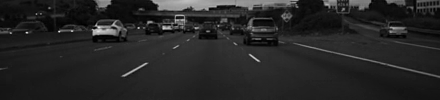

In [54]:
cv2_imshow(video_frames[rand_idxs[500],:,:])

In [0]:
random_frames = video_frames
random_train_vals = train_vals

In [0]:
# create train and validation sets
valid_idx =  15000
X_train = random_frames[:valid_idx]
y_train = random_train_vals[:valid_idx]

X_valid = random_frames[valid_idx:]
y_valid = random_train_vals[valid_idx:]

In [12]:
del video_frames, train_vals;
gc.collect()

138

In [0]:
X_train = X_train[..., np.newaxis]
y_train = y_train

X_valid = X_valid[..., np.newaxis]
y_valid = y_valid

In [53]:
y_train

array([[28.105569],
       [28.105569],
       [28.106527],
       ...,
       [13.80486 ],
       [13.793924],
       [13.840622]])

In [54]:
y_train.shape

(15000, 1)

In [0]:
from keras.layers import Dense, Flatten, BatchNormalization, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D, concatenate, Reshape
from keras.models import Sequential
from keras import Model, Input
import keras

def build_model():
  img_input = Input(shape=(cropped_image_height, cropped_image_width, 1))

  x = Conv2D(32, 3, activation='relu')(img_input)
  x = BatchNormalization()(x)

  x = Conv2D(32, 3, activation='relu')(x)
  x = BatchNormalization()(x)

  x = Conv2D(64, 3, activation='relu')(x)
  x = BatchNormalization()(x)

  x = Conv2D(64, 3, activation='relu')(x)
  x = BatchNormalization()(x)

  x = Conv2D(128, 3, activation='relu')(x)
  x = BatchNormalization()(x)

  x = Conv2D(128, 3, activation='relu')(x)
  x = BatchNormalization()(x)

  x = GlobalMaxPooling2D()(x)
  x = Dropout(0.5)(x)
  
  x = Dense(100, activation='relu')(x)
  x = BatchNormalization()(x)
  

  x = Dense(1, activation='relu')(x)

  mod = Model(inputs=[img_input], outputs=x)
  mod.compile('adam', 'mse')
  return mod

# model = build_model()

In [0]:
model = build_model()

In [71]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 100, 440, 1)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 98, 438, 32)       320       
_________________________________________________________________
batch_normalization_17 (Batc (None, 98, 438, 32)       128       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 96, 436, 32)       9248      
_________________________________________________________________
batch_normalization_18 (Batc (None, 96, 436, 32)       128       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 94, 434, 64)       18496     
_________________________________________________________________
batch_normalization_19 (Batc (None, 94, 434, 64)       256 

In [72]:
history = model.fit(
    X_train,
    y_train, 
    epochs=10,
    batch_size=32,
    validation_data=(X_valid, y_valid))

Train on 15000 samples, validate on 5400 samples
Epoch 1/10
15000/15000 [==============================] - 201s 13ms/step - loss: 116.2892 - val_loss: 123.1729
Epoch 2/10
15000/15000 [==============================] - 199s 13ms/step - loss: 14.8268 - val_loss: 61.7413
Epoch 3/10
15000/15000 [==============================] - 199s 13ms/step - loss: 4.6695 - val_loss: 43.4116
Epoch 4/10
15000/15000 [==============================] - 199s 13ms/step - loss: 3.4884 - val_loss: 70.3547
Epoch 5/10
15000/15000 [==============================] - 200s 13ms/step - loss: 2.6113 - val_loss: 70.8081
Epoch 6/10
15000/15000 [==============================] - 200s 13ms/step - loss: 2.7293 - val_loss: 60.3324
Epoch 7/10
15000/15000 [==============================] - 200s 13ms/step - loss: 2.7038 - val_loss: 62.8945
Epoch 8/10
15000/15000 [==============================] - 200s 13ms/step - loss: 2.4725 - val_loss: 81.8869
Epoch 9/10
15000/15000 [==============================] - 200s 13ms/step - loss: 2.

In [0]:
def load_video_and_save_to_drive(filename, numberOfFrames):
  # load video frame by frame
  cap = VideoCapture(str(drive_path/filename))
  i = 0
  video_frames = []

  while i < numberOfFrames:
    ret_val, frame = cap.read()
    cropped_image = frame[200:200+cropped_image_height,100:100+cropped_image_width, 2]
    video_frames.append(np.array(cropped_image))
    i = i + 1

  print("processed finished")
  video_frames = np.array(video_frames)
  print("Saving...")
  np.save(str(drive_path/f'frames-{filename}'), video_frames)
  cap.release()

In [116]:
load_video_and_save_to_drive('test.mp4', 10798)

processed finished
Saving...


In [0]:
test_video_frames = np.load(str(drive_path/'frames-test.mp4.npy'))

In [73]:
test_video_frames.shape

(10798, 100, 440, 1)

In [0]:
test_video_frames = test_video_frames[..., np.newaxis] / 255

In [0]:
predictions = model.predict(test_video_frames)

In [81]:
predictions

array([[17.770994],
       [18.333986],
       [19.05152 ],
       ...,
       [14.621207],
       [14.47956 ],
       [14.278064]], dtype=float32)

In [82]:
train_vals.min()

0.0

In [83]:
predictions.min()

3.986187

In [84]:
predictions.max()

25.80058

In [79]:
predictions.mean()

14.727596